In [13]:
import tensorflow_datasets as tfds

dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

In [14]:
tokenizer = info.features['text'].encoder

In [15]:
BUFFER_SIZE = 500
BATCH_SIZE = 200

train_data, test_data = dataset['train'], dataset['test'], 

train_dataset = train_data.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [16]:
import tensorflow as tf

embedding_dim = 32
lstm_dim = 32
dense_dim = 32

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          261920    
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               16640     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 280,673
Trainable params: 280,673
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

Epoch 1/5
125/125 [==============================] - 419s 3s/step - loss: 0.5623 - accuracy: 0.6900 - val_loss: 0.3955 - val_accuracy: 0.8348
Epoch 2/5
125/125 [==============================] - 411s 3s/step - loss: 0.3355 - accuracy: 0.8700 - val_loss: 0.3904 - val_accuracy: 0.8413
Epoch 3/5
125/125 [==============================] - 413s 3s/step - loss: 0.2473 - accuracy: 0.9101 - val_loss: 0.3805 - val_accuracy: 0.8505
Epoch 4/5
125/125 [==============================] - 417s 3s/step - loss: 0.2016 - accuracy: 0.9304 - val_loss: 0.4004 - val_accuracy: 0.8416
Epoch 5/5
125/125 [==============================] - 410s 3s/step - loss: 0.1793 - accuracy: 0.9373 - val_loss: 0.4281 - val_accuracy: 0.8505


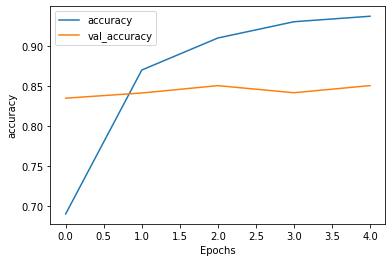

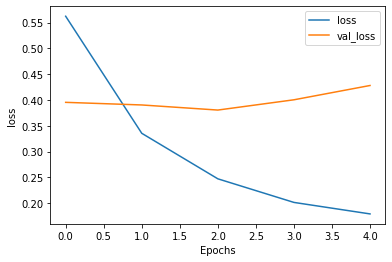

In [20]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
 
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")